In [1]:
import pandas as pd

df = pd.read_csv('dataset1.csv')
display(df.head())

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


**Reasoning**:
Check for missing values in the DataFrame.



In [2]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
N         0
P         0
K         0
pH        0
EC        0
OC        0
S         0
Zn        0
Fe        0
Cu        0
Mn        0
B         0
Output    0
dtype: int64


## Data analysis

### Subtask:
Perform exploratory data analysis to understand the data distribution, relationships between features, and characteristics of the target variable.


,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


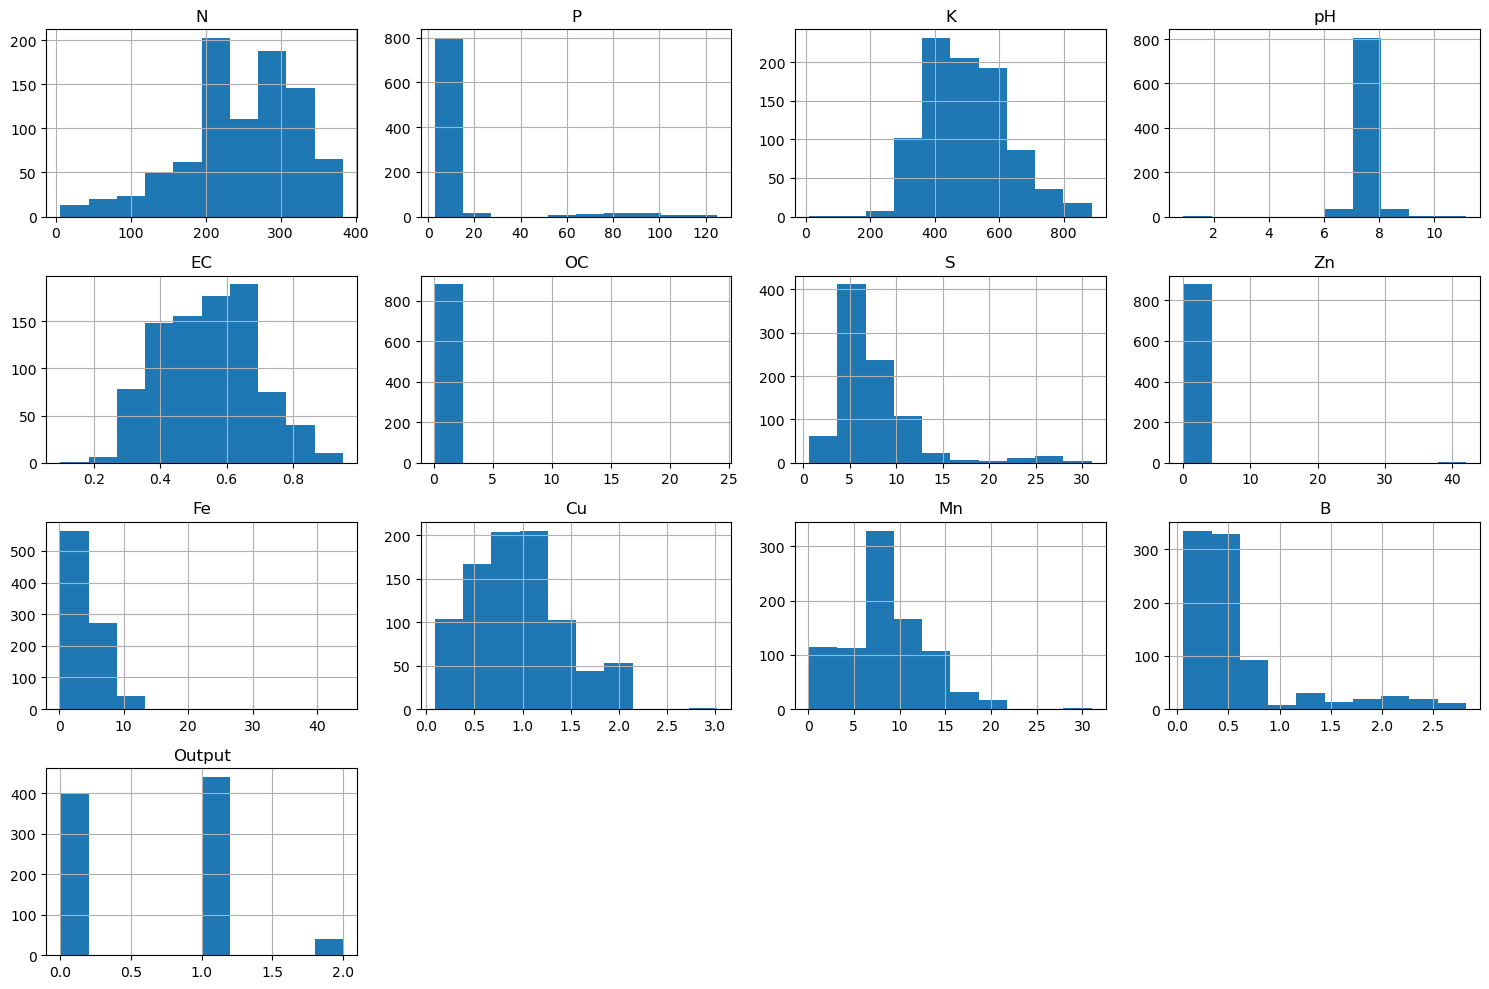

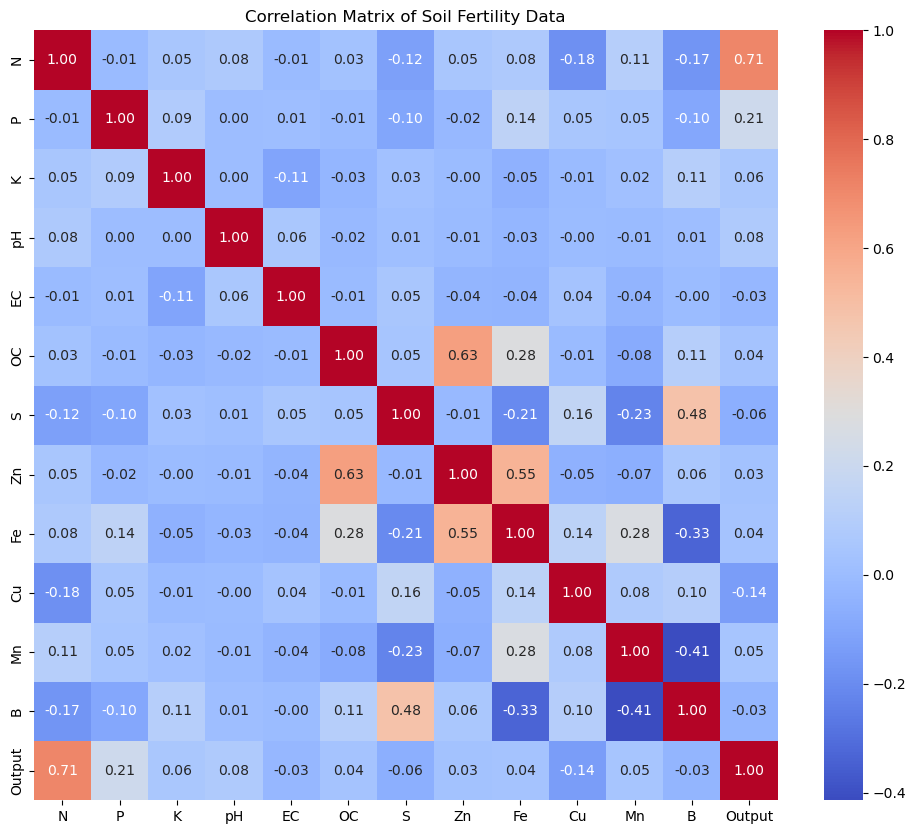

In [3]:
import matplotlib.pyplot as plt

display(df.describe())

df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Soil Fertility Data')
plt.show()

**Reasoning**:
Separate features and target, then split the data into training and testing sets.



In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('Output', axis=1)
y = df['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (704, 12)
X_test shape: (176, 12)
y_train shape: (704,)
y_test shape: (176,)


## Check class imbalance

### Subtask:
Examine the distribution of the target variable to identify potential class imbalance.


Class distribution in y_train:
Output
1    352
0    323
2     29
Name: count, dtype: int64


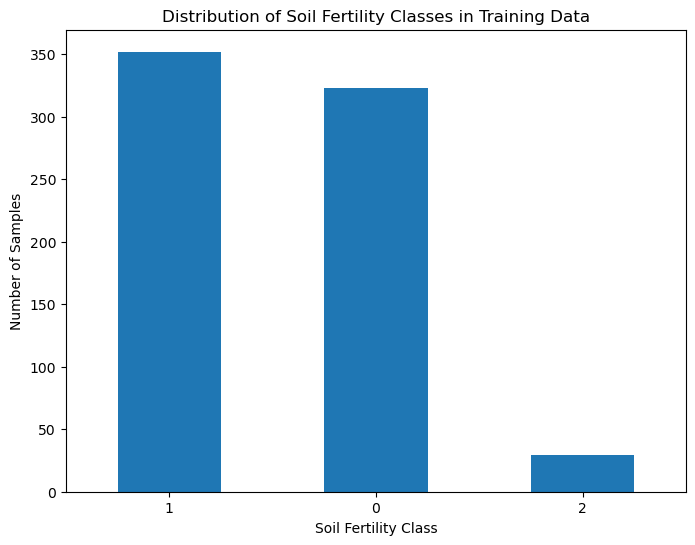

In [5]:
import matplotlib.pyplot as plt

class_distribution = y_train.value_counts()
print("Class distribution in y_train:")
print(class_distribution)

plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar')
plt.title('Distribution of Soil Fertility Classes in Training Data')
plt.xlabel('Soil Fertility Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

**Reasoning**:
Apply SMOTE to the training data to address the class imbalance and then print the value counts of the resampled target variable.



In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution in y_train_resampled after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution in y_train_resampled after SMOTE:
Output
1    352
2    352
0    352
Name: count, dtype: int64


## Train xgboost model

### Subtask:
Train an XGBoost classifier on the preprocessed training data.


**Reasoning**:
Import XGBoost classifier, instantiate the model, and train it on the resampled training data.



In [9]:
! pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 4.3 MB/s eta 0:00:17
   - -------------------------------------- 1.8/72.0 MB 5.0 MB/s eta 0:00:15
   - -------------------------------------- 3.4/72.0 MB 5.9 MB/s eta 0:00:12
   -- ------------------------------------- 5.0/72.0 MB 6.4 MB/s eta 0:00:11
   --- ------------------------------------ 6.6/72.0 MB 6.6 MB/s eta 0:00:10
   ---- ----------------------------------- 8.1/72.0 MB 6.8 MB/s eta 0:00:10
   ----- ---------------------------------- 9.7/72.0 MB 6.9 MB/s eta 0:00:10
   ------ --------------------------------- 11.5/72.0 MB 7.1 MB/s eta 0:00:09
   ------- -------------------------------- 13.1/72.0 MB 7.2 MB/s eta 0:00:09
   -------- ------------------------------- 14.4/72.0 MB 7.1 MB/s eta 0:00:09
   --------- ------------------------------ 16.3/72.0 MB 7.2 MB/s eta 0:00:08
   --------- ------------------------------ 17.8/72.0 MB 7.3 MB/s eta 0:00:08
 

In [10]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Evaluate model

### Subtask:
Evaluate the trained model's performance using appropriate metrics.


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.8864

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        78
           1       0.95      0.83      0.88        88
           2       0.50      0.70      0.58        10

    accuracy                           0.89       176
   macro avg       0.78      0.83      0.80       176
weighted avg       0.90      0.89      0.89       176


Confusion Matrix:
[[76  2  0]
 [ 8 73  7]
 [ 1  2  7]]


## Predict and output

### Subtask:
Make predictions on the test set and display the results.


**Reasoning**:
Make predictions on the test set using the trained XGBoost model and display the predictions.



In [12]:
y_pred = xgb_model.predict(X_test)
print("Predicted soil fertility classes for the test set:")
print(y_pred)

Predicted soil fertility classes for the test set:
[1 0 0 0 0 1 0 1 2 0 1 2 2 1 0 1 1 1 0 1 0 0 1 1 1 2 0 0 1 1 1 1 1 0 1 2 1
 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 2 1 1 0 1
 1 1 0 0 0 2 1 0 1 1 1 1 0 0 1 1 2 1 2 1 0 0 0 0 1 0 1 0 0 2 0 1 0 0 1 0 0
 0 1 0 1 0 0 1 2 0 0 2 1 0 0 1 1 1 0 1 0 1 2 0 1 1 2 0 0 0 0 0 1 0 1 0 1 0
 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0]


## Interactive prediction

### TEST:
the user will  input their own soil data and get a prediction from the trained model.


In [13]:
import numpy as np

# Generate random data for a single sample based on the features in X
random_data = {col: np.random.rand() * (X[col].max() - X[col].min()) + X[col].min() for col in X.columns}
random_df = pd.DataFrame([random_data])

# Predict the soil fertility class
predicted_class = xgb_model.predict(random_df)

print("Generated input data:")
display(random_df)
print("\nPredicted soil fertility class:")
print(predicted_class[0])

Generated input data:


,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
0,109.156497,68.716923,567.437297,4.872134,0.393767,14.644472,11.773802,11.22273,20.485989,1.196212,16.630275,0.474321



Predicted soil fertility class:
0


## Summary:

### Data Analysis Key Findings

*   The descriptive statistics provided an initial overview of the range and distribution of numerical features and the target variable.
*   Histograms revealed the distribution shapes of individual numerical features.
*   The correlation matrix and heatmap showed the linear relationships between features and the target variable, indicating potential predictors.
*   Random data was successfully generated for a single sample based on the feature ranges of the training data.
*   The trained XGBoost model successfully predicted the soil fertility class for the randomly generated input data.




## Save Model

Save the trained XGBoost model

In [14]:
import joblib
joblib.dump(xgb_model, 'xgb_soil_analysis.bin')

['xgb_soil_analysis.bin']